In [91]:
import pydataset
mpg = pydataset.data('mpg')

In [92]:
mpg['fl'].value_counts()

r    168
p     52
e      8
d      5
c      1
Name: fl, dtype: int64

In [93]:
mpg.drop(index = mpg[(mpg['fl'] == 'e')].index, inplace=True)
mpg.drop(index = mpg[mpg['fl'] == 'd'].index, inplace=True)
mpg.drop(index = mpg[mpg['fl'] == 'c'].index, inplace=True)
mpg['fl'].value_counts()

r    168
p     52
Name: fl, dtype: int64

In [94]:
X_features = mpg.drop(['fl'], axis = 1)
y_labels = mpg['fl'] 

In [95]:
# 현재 피처값에 문자열이 존재한다 이를 레이블 인코딩 하시오
X_features.info()

# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 220 entries, 1 to 234
# Data columns (total 10 columns):
#  #   Column        Non-Null Count  Dtype  
# ---  ------        --------------  -----  
#  0   manufacturer  220 non-null    object 
#  1   model         220 non-null    object 
#  2   displ         220 non-null    float64
#  3   year          220 non-null    int64  
#  4   cyl           220 non-null    int64  
#  5   trans         220 non-null    object 
#  6   drv           220 non-null    object 
#  7   cty           220 non-null    int64  
#  8   hwy           220 non-null    int64  
#  9   class         220 non-null    object 
# dtypes: float64(1), int64(4), object(5)
# memory usage: 18.9+ KB

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_labels = encoder.fit_transform(y_labels)
y_labels

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 1 to 234
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  220 non-null    object 
 1   model         220 non-null    object 
 2   displ         220 non-null    float64
 3   year          220 non-null    int64  
 4   cyl           220 non-null    int64  
 5   trans         220 non-null    object 
 6   drv           220 non-null    object 
 7   cty           220 non-null    int64  
 8   hwy           220 non-null    int64  
 9   class         220 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 18.9+ KB


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [96]:
columns = X_features.columns

for column in ['manufacturer', 'model', 'trans', 'drv', 'class']:
    X_features[column] = encoder.fit_transform(X_features[column])

X_features

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,class
1,0,1,1.8,1999,4,3,1,18,29,1
2,0,1,1.8,1999,4,8,1,21,29,1
3,0,1,2.0,2008,4,9,1,20,31,1
4,0,1,2.0,2008,4,0,1,21,30,1
5,0,1,2.8,1999,6,3,1,16,26,1
...,...,...,...,...,...,...,...,...,...,...
230,14,31,2.0,2008,4,7,1,19,28,2
231,14,31,2.0,2008,4,9,1,21,29,2
232,14,31,2.8,1999,6,3,1,16,26,2
233,14,31,2.8,1999,6,8,1,18,26,2


In [97]:
# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

dt_clf = DecisionTreeClassifier()

scores = cross_val_score(dt_clf, X_features, y_labels, scoring = 'accuracy', cv = 5)
print(f'정확도 : {np.mean(scores)}')

정확도 : 0.7045454545454546


In [141]:
import pandas as pd
import numpy as np

# 읽어오기
card_df = pd.read_csv("./creditcard.csv/creditcard.csv")
card_df[:3]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [99]:
card_df.shape

(284807, 31)

## 언더 샘플링과 오버 샘플링의 이해
레이블이 불균형한 분포를 가진 Data set를 학습 시킬 때 예측성능의 문제가 발생할 수 있다. 이살 레이블을 가지는 데이터 건수가 매우 적기 때문에 제대로 다양한 유형을 학습하지 못하는 반면 정상 레이블을 가지는 데이터 건수가 매우 많기 때문에 생기는 문제이다. 그렇기 때문에 적절한 학습 데이터를 확보하는 방안이 필요한데, 대표적으로 언더 샘플링과 오버 샘플링이 있다.

### 언더 샘플링
- 많은 데이터 셋을 적은 데이터 셋 수준으로 감소시키는 방식
- 정상 레이블이 10,000건, 이상레이블이 100 건이라면 정상 레이블 데이터도 100건으로 줄여버린다
- 과도하게 정상 레이블로 학습/예측하는 부작용은 개선되었지만 과도한 데이터 감소로 오히려 정상 레이블의 제대로된 학습 수행이 어려울 수 있다.

### 오버 샘플링
- 예측 성능상 더 유리한 경우가 많아 주로 사용된다
- 적은 데이터 셋을 많은 데이터 셋 수준으로 증가하여 맞추는 방식
- 단순히 동일 데이터를 증식한다면 과적합 될 수 있기 때문에, 원본 데이터 피처값을 약간 변경하며 증식한다
- 대표적으로는 SMOTE(Synthetic Minority Over-sampling Technique) 방법이 있다
- SMOTE 는 적은 데이터 셋에 있는 개별 데이터들의 K최근접 이웃(KNN)을 찾아 데이터와 K개의 이웃들 차이를 일정 값으로 만들어 기존 데이터와 약간의 차이가 나는 새로운 데이터들을 생성하는 방식이다.

In [142]:
# Time 컬럼은 크게 필요치 않아 제거한다.
card_df.drop(['Time'], axis=1, inplace=True)
card_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [102]:
# 데이터 셋 분리
from sklearn.model_selection import train_test_split

X_features = card_df.iloc[:,:-1]
y_lables = card_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_lables, test_size=0.3, random_state=0, stratify=y_lables)

stratify?

In [69]:
# 나눠진 데이터 셋트들의 비율을 서로 환산하여 분할 비율 확인
print('학습데이터 레이블 값 비율')
print(y_train.value_counts()/len(y_train))
print()
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/len(y_test))

학습데이터 레이블 값 비율
0    0.998275
1    0.001725
Name: Class, dtype: float64

테스트 데이터 레이블 값 비율
0    0.998268
1    0.001732
Name: Class, dtype: float64


학습 데이터와 테스트 데이터의 1값이 약 0.0017로 큰차이없이 분할된것을 확인해 볼 수 있다.

먼저 로지스틱 회귀를 이용하여 사기 여부를 예측해보겠다. 성능 평가는 전에 정의했던 사용자 함수 `get_clf_eval()` 함수를 다시 사용

In [103]:
# 모델 생성
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(max_iter = 1000)

# 학습/예측
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)

# output이 두개가 나오는데 뒤( =1값 =positive값)만 취하겠다.
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

In [104]:
# 사용자 정의함수
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion, '\n')
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc)) 

In [105]:
# 평가
get_clf_eval(y_test, preds, lr_pred_proba)

오차 행렬
[[85281    14]
 [   57    91]] 

정확도: 0.9992, 정밀도: 0.8667, 재현율: 0.6149,    F1: 0.7194, AUC:0.9702


이번에는 LGBMClassifier를 이용하여 모델을 학습한 뒤 별도의 테스트 데이터셋에서 예측 평가를 수행해보자

In [79]:
# 모델 생성, fit, predict, evaluate
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]

# 오차행렬, 정확도, 정밀도, 재현율, f1, auc
get_clf_eval(y_test, preds, lgbm_pred_proba)

오차 행렬
[[85290     5]
 [   36   112]] 

정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


## 추가적으로 데이터 정제 후 적용
### 표준 정규분포 형태로 변환

In [183]:
card_df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

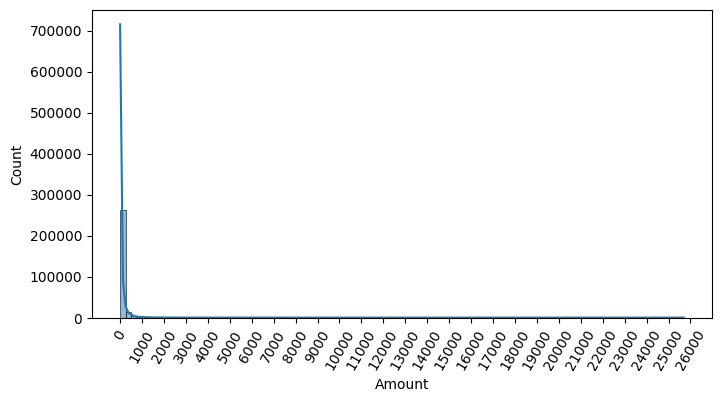

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(card_df['Amount'], bins=100, kde=True)
plt.show()

In [203]:
# 표준화 하기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
card_df['Amount'] = scaler.fit_transform(card_df['Amount'].values.reshape(-1, 1))

In [204]:
card_df['Amount'].max()

102.36224270928423

In [205]:
card_df['Amount'].min()

-0.3532293929668236

In [206]:
# 표준화 결과 평균이 0-분산이 1에 가까운 정규 분포형태가 되었는지 확인
print(f"평균\n{card_df['Amount'].mean()}")
print(f"분산\n{card_df['Amount'].var()}")

평균
-1.5966860045099457e-17
분산
1.000003511161984


In [108]:
# 데이터 셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_lables, test_size=0.3, random_state=0, stratify=y_lables)

# 로지스틱 회귀 예측
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]
# 평가
print('로지스틱 회귀 예측')
get_clf_eval(y_test, preds, lr_pred_proba)


# LightGBM 예측 성능
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
# 평가
print('\nLightGBM 예측 성능')
get_clf_eval(y_test, preds, lgbm_pred_proba)

로지스틱 회귀 예측
오차 행렬
[[85281    14]
 [   57    91]] 

정확도: 0.9992, 정밀도: 0.8667, 재현율: 0.6149,    F1: 0.7194, AUC:0.9702

LightGBM 예측 성능
오차 행렬
[[85290     5]
 [   36   112]] 

정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


변환 전 수치
```
로지스틱 회귀 예측
[정확도: 0.9992, 정밀도: 0.8667, 재현율: 0.6149,    F1: 0.7194, AUC:0.9702]
LightGBM 예측 성능
[정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790]
```
위와 같았음으로 정말 큰차이가 안보이는 것을 확인할 수 있다. ~~안보이는 정도가 아니라 값이 같다~~

## 로그 변환 후 적용

로그 변환은 데이터 분포도가 심하게 왜곡 되어있을 경우 적용하는 중요 기법 중 하나. 원래 값을 log값으로 변환해 작은 값으로 변환하기 때문에 데이터 분포도의 왜곡을 상당 수준 개선해 준다.

In [106]:
card_df_log = pd.read_csv("./creditcard.csv/creditcard.csv")
card_df_log.drop(['Time'], axis=1, inplace=True)
card_df_log[:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [110]:
# log 변환하기
# numpy 의 log1p()함수를 이용해 변환해보자
card_df_log['Amount'] = np.log1p(card_df_log['Amount'])

In [112]:
# 데이터 셋 분리
from sklearn.model_selection import train_test_split
X_features = card_df_log.iloc[:,:-1]
y_lables = card_df_log.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_lables, test_size=0.3, random_state=0, stratify=y_lables)

# 로지스틱 회귀 예측
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]
# 평가
print('로지스틱 회귀 예측')
get_clf_eval(y_test, preds, lr_pred_proba)


# LightGBM 예측 성능
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
# 평가
print('\nLightGBM 예측 성능')
get_clf_eval(y_test, preds, lgbm_pred_proba)

로지스틱 회귀 예측
오차 행렬
[[85283    12]
 [   59    89]] 

정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727

LightGBM 예측 성능
오차 행렬
[[85290     5]
 [   36   112]] 

정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


변환 전 수치
```
로지스틱 회귀 예측
[정확도: 0.9992, 정밀도: 0.8667, 재현율: 0.6149,    F1: 0.7194, AUC:0.9702]
LightGBM 예측 성능
[정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790]
```
로지스틱의 경우 정밀도와 AUC는 조금 향상되었으나 재현율은 저하된 모습.
LightGBM의 경우는 변환전과 후가 같은 결과를 보이고 있다.

## 이상치 제거 후 적용
이상치를 찾는 방법은 여러가지가 있지만 이중에서 IQR(Inter Quantile Range) 방식을 적용한다. 모든 피처들의 이상치를 검출한느 것은 시간이 많이 소모되며, 결정값과 상관성이 높지 않은 피처들의 경우는 이상치를 제거하더라고 크게 성능 향상에 기여하지 않기 때문에 결정값(즉 레이블)과 가장 상관성이 높은 피처들을 위추로 이상치를 검출하는 것이 좋다.

In [159]:
card_df_iqr = pd.read_csv("./creditcard.csv/creditcard.csv")
card_df_iqr.drop(['Time'], axis=1, inplace=True)
card_df_iqr[:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


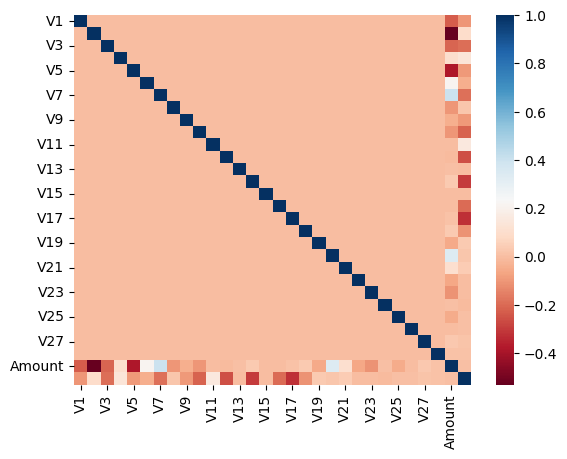

In [144]:
# DataFrame의 corr()을 이용해 각 피처별로 상관도를 구한 뒤 heatmap 시각화
# 양이 상관도가 높을수록 파란색에 가까우며, 음의 상관관계가 높을 수록 붉은 색에 가깝다.
corr_M = card_df_iqr.corr()
sns.heatmap(corr_M, cmap="RdBu")
plt.show()

히트맵을 보면 음의 상관관계가 가장 높은 것이 v14와 v17로 나왔고 이중 v14에 대해서만 이상치를 찾아 제거해보도록 하자.

In [145]:
# class 가 1인 경우에만 진행할 것이기 때문에 솎아준다.
fraud = card_df_iqr[card_df_iqr['Class'] == 1]
fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [146]:
# 넘파이 함수를 이용해 1/4분위와 3/4분위를 구하고, 이에 기반하여 IQR을 계산한다.
Q_25 = np.percentile(fraud.V14, 25)
Q_75 = np.percentile(fraud.V14, 75)
IQR = Q_75 -Q_25
IQR

5.409902115485521

In [147]:
# 또 다르게 IQR 계산하기
Q_25 = fraud['V14'].quantile(.25)
Q_75 = fraud['V14'].quantile(.75)
IQR = Q_75 - Q_25
IQR

5.409902115485521

In [148]:
# 구해진 IQR에 1.5를 곱해 최대값과 최소값 지점 구하기
upper_out = Q_75 + 1.5 * IQR
under_out = Q_25 - 1.5 * IQR

# 이상치 데이터 검색 
cond1 = fraud['V14'] >= upper_out
cond2 = fraud['V14'] <= under_out
fraud.V14[cond1 | cond2]

8296   -19.214325
8615   -18.822087
9035   -18.493773
9252   -18.049998
Name: V14, dtype: float64

In [149]:
# 이상치의 데이터 인덱스 담아주기
temp = fraud.V14[cond1 | cond2].index
temp

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [157]:
card_df_iqr.shape

(284807, 30)

In [163]:
# card_df에서 이상치를 제거해주세요
card_df_iqr.drop(labels = temp, axis = 0, inplace=True)

In [164]:
card_df_iqr.shape

(284803, 30)

제거 전 'shape (284807, 30)'에서 이상치 4개 제거하니 'shape (284803, 30)' 로 잘 사라진 것을 확인할 수 있다.

In [165]:
# 데이터 셋 분리
from sklearn.model_selection import train_test_split
X_features = card_df_iqr.iloc[:,:-1]
y_lables = card_df_iqr.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_lables, test_size=0.3, random_state=0, stratify=y_lables)

# 로지스틱 회귀 예측
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]
# 평가
print('로지스틱 회귀 예측')
get_clf_eval(y_test, preds, lr_pred_proba)


# LightGBM 예측 성능
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
# 평가
print('\nLightGBM 예측 성능')
get_clf_eval(y_test, preds, lgbm_pred_proba)

로지스틱 회귀 예측
오차 행렬
[[85279    16]
 [   48    98]] 

정확도: 0.9993, 정밀도: 0.8596, 재현율: 0.6712,    F1: 0.7538, AUC:0.9739

LightGBM 예측 성능
오차 행렬
[[85291     4]
 [   25   121]] 

정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9791


변환 전 수치
```
로지스틱 회귀 예측
[정확도: 0.9992, 정밀도: 0.8667, 재현율: 0.6149,    F1: 0.7194, AUC:0.9702]
LightGBM 예측 성능
[정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790]
```
로지스틱의 경우 정확도와 재현율, f1, auc 가 향상 되었으나 정밀도는 조금 떨어진 모습
LightGBM의 경우 5가지 모두 전반적으로 향상된 모습을 확인 가능

## log와 이상치 제거를 함께 한다면?

In [166]:
# card_df_iqr 데이터에 log 적용
card_df_iqr['Amount'] = np.log1p(card_df_iqr['Amount'])

In [167]:
# 데이터 셋 분리
from sklearn.model_selection import train_test_split
X_features = card_df_iqr.iloc[:,:-1]
y_lables = card_df_iqr.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_lables, test_size=0.3, random_state=0, stratify=y_lables)

# 로지스틱 회귀 예측
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]
# 평가
print('로지스틱 회귀 예측')
get_clf_eval(y_test, preds, lr_pred_proba)


# LightGBM 예측 성능
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
# 평가
print('\nLightGBM 예측 성능')
get_clf_eval(y_test, preds, lgbm_pred_proba)

로지스틱 회귀 예측
오차 행렬
[[85281    14]
 [   48    98]] 

정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743

LightGBM 예측 성능
오차 행렬
[[85291     4]
 [   25   121]] 

정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9791


이상치 제거만 했을 때는 아래와 같았다.
```
로지스틱 회귀 예측
[정확도: 0.9993, 정밀도: 0.8596, 재현율: 0.6712,    F1: 0.7538, AUC:0.9739]

LightGBM 예측 성능
[정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9791]
```
함께 했을 때.. 로지스틱의 경우 정밀도와 f1, auc가 향상되었다.
LightGBM의 경우변화가 없는 모습.
성능이 떨어지지는 않았으니 같이 하는 것이 나쁘지는 않은 선택같이 보이는 결과를 주었다.

## SMOTE 오버 샘플링 적용
SMOTE를 적용할 때에는 반드시 학습 데이터 셋만 오버 샘플링을 해야한다. 검증 데이터 셋이나 테스트 데이터 셋을 오버 샘플링할 경우 결국은 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 테스트를 수행하기 때문에 올바른 검증/테스트가 될수 없기 때문이다.

In [100]:
# SMOTE를 구현한 대표적인 파이썬 패키지 설치
!pip install imbalanced-learn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [177]:
# 데이터 증식
from imblearn.over_sampling import SMOTE

# test는 건드리면 안된다. 따라서 train만 건드리기
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f'SMOTE 적용전 학습용 피처/레이블 데이터 셋 : {X_train.shape}, {y_train.shape}')
print(f'SMOTE 적용후 학습용 피처/레이블 데이터 셋 : {X_train_smote.shape}, {y_train_smote.shape}')
print(f'SMOTE 적용후 레이블 값 분포 : \n{pd.Series(y_train_smote).value_counts()}')

SMOTE 적용전 학습용 피처/레이블 데이터 셋 : (199362, 29), (199362,)
SMOTE 적용후 학습용 피처/레이블 데이터 셋 : (398040, 29), (398040,)
SMOTE 적용후 레이블 값 분포 : 
0    199020
1    199020
Name: Class, dtype: int64


In [178]:
# 로지스틱 회귀 예측
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
preds = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]
# 평가
print('로지스틱 회귀 예측')
get_clf_eval(y_test, preds, lr_pred_proba)


# LightGBM 예측 성능
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
preds = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
# 평가
print('\nLightGBM 예측 성능')
get_clf_eval(y_test, preds, lgbm_pred_proba)

로지스틱 회귀 예측
오차 행렬
[[85281    14]
 [   48    98]] 

정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743

LightGBM 예측 성능
오차 행렬
[[85291     4]
 [   25   121]] 

정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9791


SMOTE 이 전 수치
```
로지스틱 회귀 예측
[정확도: 0.9992, 정밀도: 0.8667, 재현율: 0.6149,    F1: 0.7194, AUC:0.9702]
LightGBM 예측 성능
[정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790]
```
로지스틱의 경우 전체적으로 조금씩 향상된 모습
LightGBM의 경우에도 전체적으로 조금씩 향상된 모습을 보였다.

In [180]:
def get_model_train_eval(model, train_x=None, test_x=None, train_y=None, test_y=None):
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    pred_proba = model.predict_proba(test_x)[:,1]
    get_clf_eval(test_y, pred, pred_proba)

In [182]:
print('LightGBM : boost_from_average=True 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=True)
get_model_train_eval(lgbm_clf, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)



print('\nLightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test)


LightGBM : boost_from_average=True 예측 성능
오차 행렬
[[85268    27]
 [   36   110]] 

정확도: 0.9993, 정밀도: 0.8029, 재현율: 0.7534,    F1: 0.7774, AUC:0.9219

LightGBM 예측 성능
오차 행렬
[[85291     4]
 [   25   121]] 

정확도: 0.9997, 정밀도: 0.9680, 재현율: 0.8288,    F1: 0.8930, AUC:0.9791


# 정말 옵션값만 True / False로 설정해줬을 뿐인데 모든 값에서 값이 떨어진 것을 확인할 수 있었다. 가중치 업데이트 시 평균값에서 시작하게 하는 옵션이라는데 데이터가 불균형하기 때문에 평균값도 올바르지 않아서(? 그런것일까...

LightGBM 2.1.0 이상 버전에서 `boost_from_average` 파라미터 디폴트 값은 True이기 때문에 데이터 값이 불균형하면 False 로 꺼주는 것을 잊지 말자.

In [207]:
LGBMClassifier?

Init signature:
LGBMClassifier(
    boosting_type: str = 'gbdt',
    num_leaves: int = 31,
    max_depth: int = -1,
    learning_rate: float = 0.1,
    n_estimators: int = 100,
    subsample_for_bin: int = 200000,
    objective: Union[str, Callable, NoneType] = None,
    class_weight: Union[Dict, str, NoneType] = None,
    min_split_gain: float = 0.0,
    min_child_weight: float = 0.001,
    min_child_samples: int = 20,
    subsample: float = 1.0,
    subsample_freq: int = 0,
    colsample_bytree: float = 1.0,
    reg_alpha: float = 0.0,
    reg_lambda: float = 0.0,
    random_state: Union[int, numpy.random.mtrand.RandomState, NoneType] = None,
    n_jobs: int = -1,
    silent: Union[bool, str] = 'warn',
    importance_type: str = 'split',
    **kwargs,
)
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropo